In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors


from sklearn.neighbors import kneighbors_graph
random_s = 101

In [ ]:
spiral = pd.read_csv("https://raw.githubusercontent.com/renatomaaliw3/public_files/refs/heads/master/Data%20Sets/spiral.csv")
spiral.tail(3)

,Feature_1,Feature_2,Label
497,1.182719,12.407609,11
498,9.610127,1.846344,12
499,-12.628103,7.429299,10


In [ ]:
reduced_df = spiral.drop('Label', axis = 1)
reduced_df.tail(3)

,Feature_1,Feature_2
497,1.182719,12.407609
498,9.610127,1.846344
499,-12.628103,7.429299


<Axes: xlabel='Feature_1', ylabel='Feature_2'>

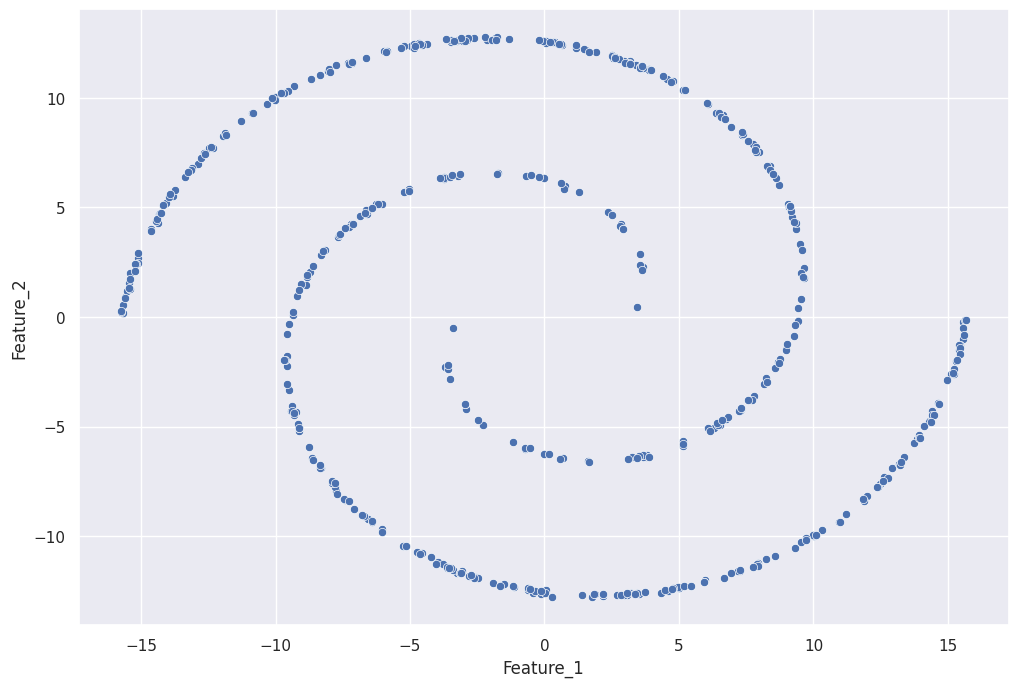

In [ ]:
sns.set(rc = {'figure.figsize': (12, 8)}) # Global Graph Size

sns.scatterplot(x = reduced_df['Feature_1'], y = reduced_df['Feature_2'])

## Based on KNN Graph, what do you think is the best epsilon value?

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 2, random_state = random_s)

reduced_df['KMeans Cluster'] = kmeans.fit_predict(reduced_df)
reduced_df.head(3)

,Feature_1,Feature_2,KMeans Cluster
0,10.007954,-9.993505,1
1,-0.120278,-12.653086,1
2,2.170166,-12.742086,1


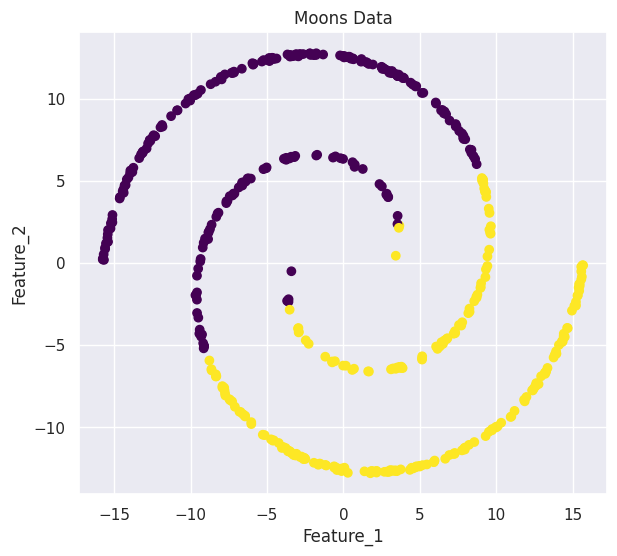

In [ ]:
# Ploting the K-Means results

plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
plt.scatter(reduced_df['Feature_1'], reduced_df['Feature_2'], c = reduced_df['KMeans Cluster'], cmap = 'viridis')
plt.title('Moons Data')
plt.xlabel('Feature_1')
plt.ylabel('Feature_2')
plt.show()

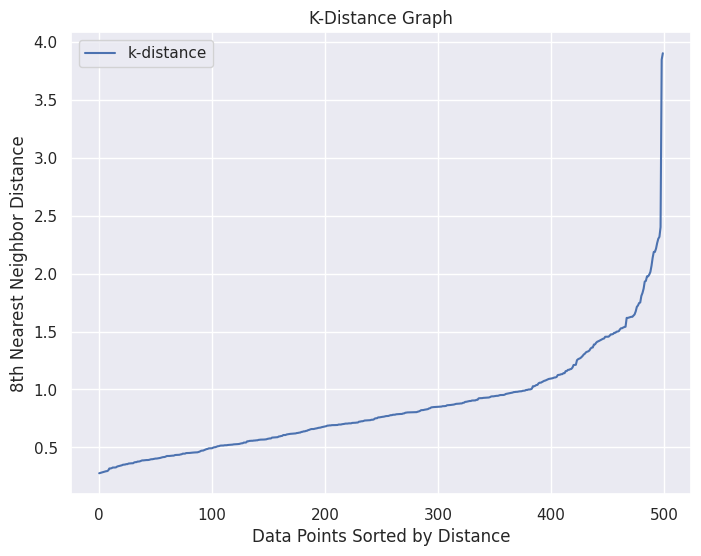

In [ ]:
from sklearn.neighbors import NearestNeighbors


min_samples = 8

neighbors = NearestNeighbors(n_neighbors = min_samples)
neighbors_fit = neighbors.fit(reduced_df)

distances, indices = neighbors_fit.kneighbors(reduced_df)

k_distances = np.sort(distances[:,-1])

# Plot the k-distance graph

plt.figure(figsize = (8,6), facecolor = 'white')
plt.plot(k_distances, label = 'k-distance')
plt.title('K-Distance Graph')
plt.xlabel('Data Points Sorted by Distance')
plt.ylabel(f'{min_samples}th Nearest Neighbor Distance')
plt.grid(True)
plt.legend()
plt.show()

Based on KNN Graph, what do you think is the best epsilon value?

# 2.5

In [ ]:
distances

array([[0.        , 0.04238113, 0.10161105, ..., 0.42412755, 0.55507522,
        0.87807592],
       [0.        , 0.1487846 , 0.15416819, ..., 0.30790026, 0.33813969,
        0.42632519],
       [0.        , 0.0918538 , 0.09338406, ..., 0.34730756, 0.40646723,
        0.51636564],
       ...,
       [0.        , 0.16016938, 0.34645488, ..., 0.5574389 , 0.56392822,
        0.64938566],
       [0.        , 0.06564691, 0.18666727, ..., 1.20465709, 1.45584595,
        1.46463809],
       [0.        , 0.06505992, 0.06852167, ..., 0.40645368, 0.42532939,
        0.52654532]])

# Based on Silhouette Score, what is the best score based solely on the graph?

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# Define range of potential eps values based on the k-distance plot

eps_values = np.linspace(0.2, 1.1, 10)

# Store S-Scores

s_scores = []


for eps in eps_values:

  dbscan = DBSCAN(eps = eps, min_samples = min_samples)  # DBSCAN
  labels = dbscan.fit_predict(reduced_df)


  if len(set(labels)) > 1:

    score = silhouette_score(reduced_df, labels)

  else:

    score = -1  # Invalid clustering scenario

  s_scores.append(score)

In [ ]:
s_scores

[-1,
 -0.3706601585711818,
 -0.27451881716761695,
 -0.17373474985278778,
 0.04710688926028321,
 0.22791124354554135,
 0.35095678990244755,
 0.4309687364129438,
 0.43220509489928366,
 0.3251048488822654]

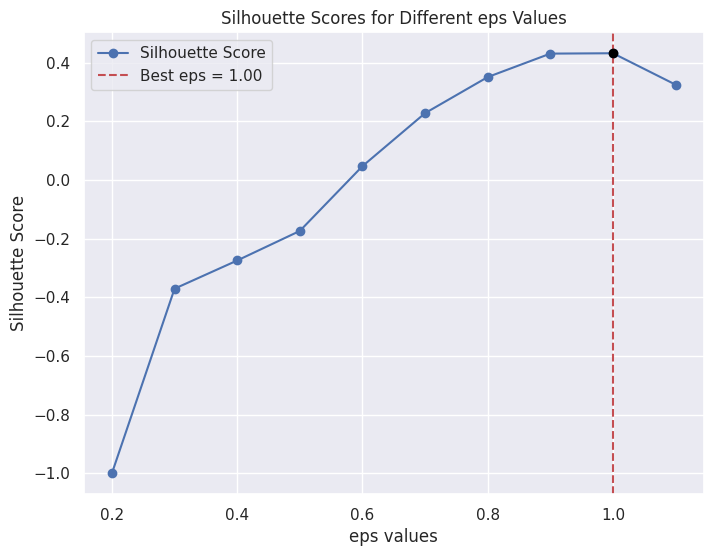

In [ ]:

plt.figure(figsize=(8, 6))


plt.plot(eps_values, s_scores, marker='o', label='Silhouette Score')

# Add labels and title
plt.title('Silhouette Scores for Different eps Values')
plt.xlabel('eps values')
plt.ylabel('Silhouette Score')
plt.grid(True)

best_eps_index = np.argmax(s_scores)
best_eps = eps_values[best_eps_index]
best_s_score = s_scores[best_eps_index]

plt.axvline(x = best_eps, color='r', linestyle='--', label = f'Best eps = {best_eps:.2f}')
plt.scatter(best_eps, best_s_score, color='black', zorder = 5)
plt.legend()
plt.show()


Based on Silhouette Score, what is the best score based solely on the graph?

# 1.0

In [ ]:
# Define DBSCAN model

final_model = DBSCAN(eps = 2.5, min_samples = 8)

# Fit the model to the scaled dataset

db_scan_clusters = final_model.fit_predict(reduced_df.iloc[:,:2])

# Add the cluster labels to the scaled DataFrame

reduced_df['DBSCAN Cluster'] = db_scan_clusters
reduced_df.head(3)

,Feature_1,Feature_2,KMeans Cluster,DBSCAN Cluster
0,10.007954,-9.993505,1,0
1,-0.120278,-12.653086,1,0
2,2.170166,-12.742086,1,0


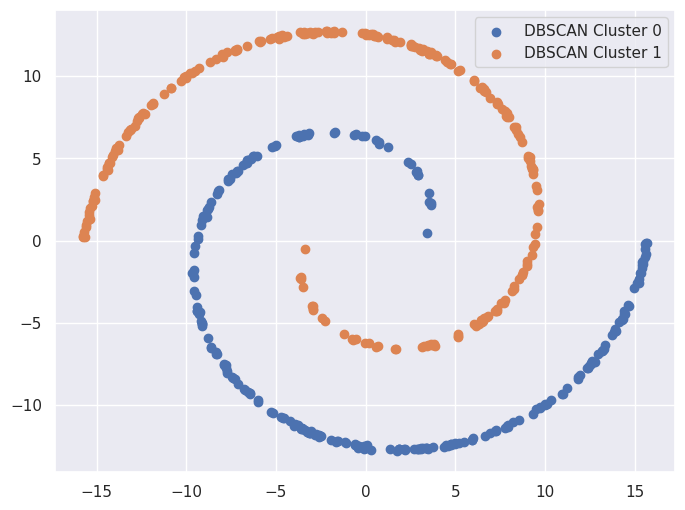

In [ ]:
# Plotting the clusters

plt.figure(figsize=(8,6))

unique_clusters = reduced_df['DBSCAN Cluster'].unique()

for cluster in unique_clusters:

    cluster_data = reduced_df[reduced_df['DBSCAN Cluster'] == cluster]

    plt.scatter(cluster_data['Feature_1'],
                cluster_data['Feature_2'],
                label=f'DBSCAN Cluster {cluster}', marker='o')



plt.legend()

# Show the plot
plt.show()

Give me posible value of epsilon that can detect the spiral cluster without outlier

# 2.5

 Give me posible value of min_samples that can detect the spiral cluster without outlier

# 8